<a href="https://colab.research.google.com/github/nadeem1155/ishika7349/blob/main/LightGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	train's binary_logloss: 0.678287	valid's binary_logloss: 0.684415
Accuracy: 0.5667

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.57      1.00      0.72        34

    accuracy                           0.57        60
   macro avg       0.28      0.50      0.36        60
weighted avg       0.32      0.57      0.41        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


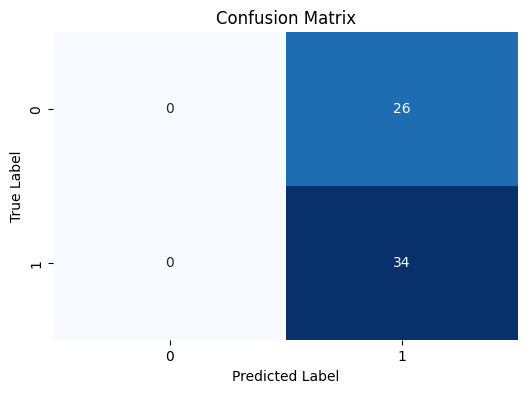

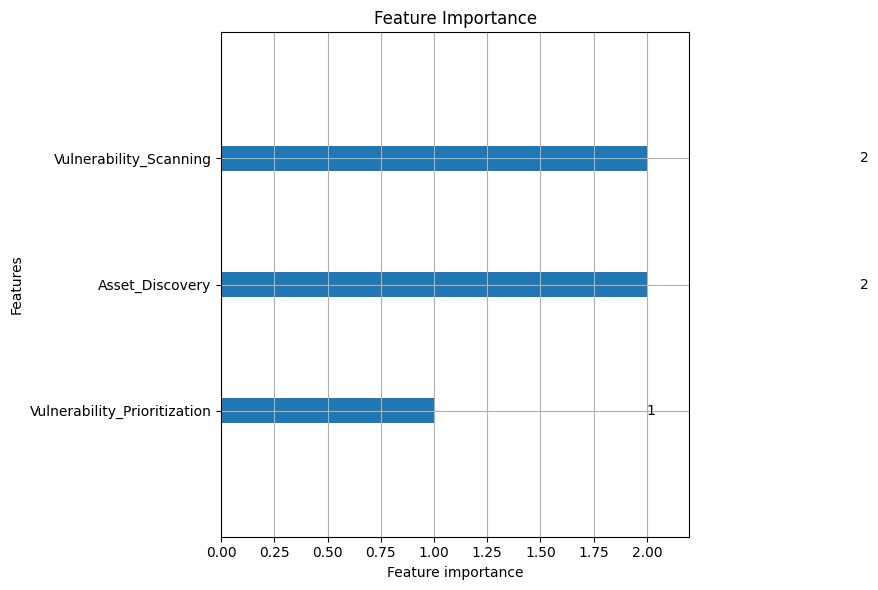

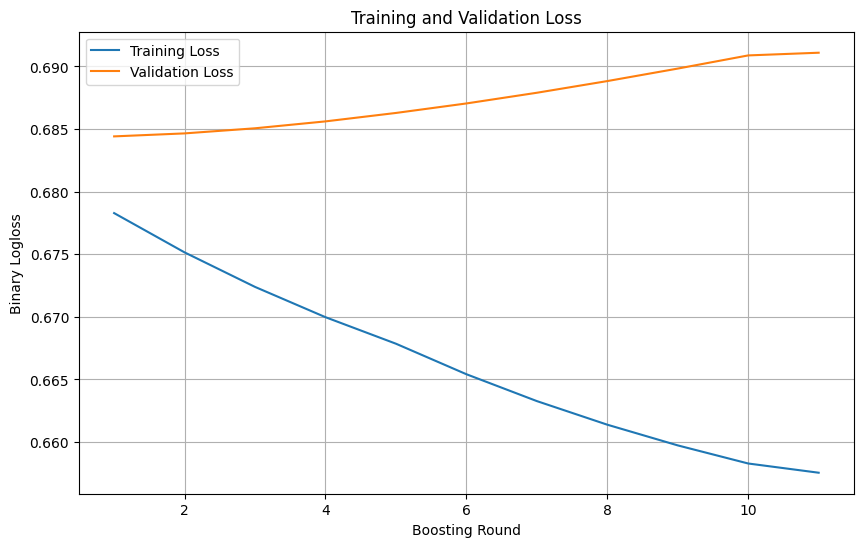

In [3]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Loading and preprocessing the dataset
def load_and_preprocess_data():
    # Read the CSV data from string
    csv_data = """
Person,Asset Discovery,Vulnerability Scanning,Risk Analysis,Vulnerability Prioritization,Remediation Planning,Remediation Execution,Reporting,Compliance and Policy Alighment,Monitoring and Testing,Integration with incident Respones,Output
Person 1,0,4,2,3,0,3,0,2,3,1
Person 2,5,9,4,4,5,9,5,9,4,5,0
Person 3,7,5,3,2,7,5,7,5,2,7,0
Person 4,9,4,4,2,9,4,9,4,2,9,1
Person 5,3,2,4,1,3,2,3,2,1,3,1
Person 6,5,8,3,3,5,8,5,8,3,5,1
Person 7,7,7,4,3,7,7,7,7,3,7,1
Person 8,9,0,5,3,9,0,9,0,3,9,1
Person 9,3,0,4,1,3,0,3,0,1,3,1
Person 10,5,0,3,2,5,0,5,0,2,5,0
Person 11,7,0,3,1,7,0,7,0,1,7,0
Person 12,9,0,4,3,9,0,9,0,3,9,1
Person 13,3,0,4,2,3,0,3,0,2,3,0
Person 14,5,0,4,2,5,0,5,0,2,5,0
Person 15,7,0,3,2,7,0,7,0,2,7,0
Person 16,9,0,4,1,9,0,9,0,1,9,1
Person 17,3,0,4,2,3,0,3,0,2,3,1
Person 18,5,0,3,2,5,0,5,0,2,5,1
Person 19,7,0,3,2,7,0,7,0,2,7,0
Person 20,9,0,3,2,9,0,9,0,2,9,0
Person 21,3,0,3,1,3,0,3,0,1,3,1
Person 22,5,0,3,2,5,0,5,0,2,5,1
Person 23,7,0,3,1,7,0,7,0,1,7,1
Person 24,9,0,3,2,9,0,9,0,2,9,1
Person 25,3,9,3,2,3,9,3,9,2,3,1
Person 26,5,5,4,2,5,5,5,5,2,5,1
Person 27,7,4,3,2,7,4,7,4,2,7,0
Person 28,9,2,3,1,9,2,9,2,1,9,0
Person 29,3,8,5,2,3,8,3,8,2,3,1
Person 30,5,7,4,2,5,7,5,7,2,5,0
Person 31,7,5,3,2,7,5,7,5,2,7,0
Person 32,9,4,3,1,9,4,9,4,1,9,0
Person 33,3,2,4,2,3,2,3,2,2,3,1
Person 34,5,8,3,3,5,8,5,8,3,5,0
Person 35,7,0,5,1,7,0,7,0,1,7,0
Person 36,9,0,3,2,9,0,9,0,2,9,1
Person 37,3,9,3,2,3,9,3,9,2,3,1
Person 38,5,5,4,2,5,5,5,5,2,5,1
Person 39,7,4,3,1,7,4,7,4,1,7,1
Person 40,9,2,4,2,9,2,9,2,2,9,1
Person 41,5,8,3,1,5,8,5,8,1,5,1
Person 42,7,0,3,2,7,0,7,0,2,7,0
Person 43,9,0,3,2,9,0,9,0,2,9,0
Person 44,3,9,4,2,3,9,3,9,2,3,1
Person 45,5,5,4,2,5,5,5,5,2,5,0
Person 46,5,4,3,2,5,4,5,4,2,5,0
Person 47,7,2,3,2,7,2,7,2,2,7,0
Person 48,9,8,3,1,9,8,9,8,1,9,1
Person 49,3,0,3,2,3,0,3,0,2,3,1
Person 50,5,0,3,2,5,0,5,0,2,5,1
Person 51,7,9,3,2,7,9,7,9,2,7,0
Person 52,9,5,3,1,9,5,9,5,1,9,0
Person 53,3,4,4,2,3,4,3,4,2,3,1
Person 54,5,2,3,2,5,2,5,2,2,5,1
Person 55,7,8,3,2,7,8,7,8,2,7,1
Person 56,9,0,3,1,9,0,9,0,1,9,1
Person 57,3,0,4,1,3,0,3,0,1,3,1
Person 58,5,9,4,2,5,9,5,9,2,5,1
Person 59,7,5,4,2,7,5,7,5,2,7,0
Person 60,9,4,3,2,9,4,9,4,2,9,0
Person 61,3,2,3,2,3,2,3,2,2,3,1
Person 62,5,8,2,1,5,8,5,8,1,5,0
Person 63,7,0,4,2,7,0,7,0,2,7,0
Person 64,9,0,4,2,9,0,9,0,2,9,0
Person 65,3,9,3,1,3,9,3,9,1,3,1
Person 66,5,5,3,2,5,5,5,5,2,5,0
Person 67,7,4,2,1,7,4,7,4,1,7,0
Person 68,9,2,3,2,9,2,9,2,2,9,1
Person 69,3,8,3,1,3,8,3,8,1,3,1
Person 70,5,0,4,2,5,0,5,0,2,5,1
Person 71,7,0,3,2,7,0,7,0,2,7,1
Person 72,9,9,4,2,9,9,9,9,2,9,1
Person 73,3,5,3,1,3,5,3,5,1,3,1
Person 74,5,4,2,2,5,4,5,4,2,5,0
Person 75,7,2,3,1,7,2,7,2,1,7,0
Person 76,9,8,4,2,9,8,9,8,2,9,1
Person 77,3,0,3,2,3,0,3,0,2,3,0
Person 78,5,0,3,2,5,0,5,0,2,5,0
Person 79,7,9,3,1,7,9,7,9,1,7,0
Person 80,9,5,3,2,9,5,9,5,2,9,1
Person 81,3,4,3,1,3,4,3,4,1,3,1
Person 82,5,2,3,2,5,2,5,2,2,5,1
Person 83,7,8,3,2,7,8,7,8,2,7,0
Person 84,9,0,3,2,9,0,9,0,2,9,0
Person 85,3,0,3,1,3,0,3,0,1,3,1
Person 86,5,9,3,2,5,9,5,9,2,5,1
Person 87,7,5,3,1,7,5,7,5,1,7,1
Person 88,9,4,3,1,9,4,9,4,1,9,1
Person 89,3,2,3,1,3,2,3,2,1,3,1
Person 90,5,8,5,3,5,8,5,8,3,5,1
Person 91,7,0,3,1,7,0,7,0,1,7,0
Person 92,9,0,2,1,9,0,9,0,1,9,0
Person 93,3,9,3,2,3,9,3,9,2,3,1
Person 94,5,5,3,2,5,5,5,5,2,5,0
Person 95,7,4,4,2,7,4,7,4,2,7,0
Person 96,9,2,3,2,9,2,9,2,2,9,0
Person 97,3,8,3,1,3,8,3,8,1,3,1
Person 98,5,0,3,1,5,0,5,0,1,5,0
Person 99,7,0,3,2,7,0,7,0,2,7,0
Person 100,9,9,4,1,9,9,9,9,1,9,1
Person 101,3,5,3,2,3,5,3,5,2,3,1
Person 102,5,4,3,1,5,4,5,4,1,5,1
Person 103,7,2,3,2,7,2,7,2,2,7,1
Person 104,9,8,3,2,9,8,9,8,2,9,1
Person 105,3,0,3,2,3,0,3,0,2,3,1
Person 106,5,0,3,1,5,0,5,0,1,5,0
Person 107,7,9,4,2,7,9,7,9,2,7,0
Person 108,9,5,3,1,9,5,9,5,1,9,1
Person 109,3,4,4,1,3,4,3,4,1,3,0
Person 110,5,2,4,2,5,2,5,2,2,5,0
Person 111,7,8,3,1,7,8,7,8,1,7,0
Person 112,9,0,3,1,9,0,9,0,1,9,1
Person 113,3,0,6,2,3,0,3,0,2,3,1
Person 114,5,9,3,1,5,9,5,9,1,5,1
Person 115,7,5,2,1,7,5,7,5,1,7,0
Person 116,9,4,3,1,9,4,9,4,1,9,0
Person 117,3,2,3,2,3,2,3,2,2,3,1
Person 118,5,8,4,1,5,8,5,8,1,5,1
Person 119,7,0,3,1,7,0,7,0,1,7,1
Person 120,9,0,3,1,9,0,9,0,1,9,1
Person 121,3,9,3,1,3,9,3,9,1,3,1
Person 122,5,5,3,1,5,5,5,5,1,5,1
Person 123,7,4,4,2,7,4,7,4,2,7,0
Person 124,9,2,4,2,9,2,9,2,2,9,0
Person 125,3,8,3,2,3,8,3,8,2,3,1
Person 126,5,0,3,1,5,0,5,0,1,5,0
Person 127,7,0,3,1,7,0,7,0,1,7,0
Person 128,9,9,3,2,9,9,9,9,2,9,0
Person 129,3,5,3,1,3,5,3,5,1,3,1
Person 130,9,4,3,1,9,4,9,4,1,9,0
Person 131,3,2,3,1,3,2,3,2,1,3,0
Person 132,5,8,4,1,5,8,5,8,1,5,1
Person 133,7,0,3,1,7,0,7,0,1,7,1
Person 134,9,0,3,1,9,0,9,0,1,9,1
Person 135,3,9,3,1,3,9,3,9,1,3,1
Person 136,5,5,3,2,5,5,5,5,2,5,1
Person 137,7,4,4,2,7,4,7,4,2,7,1
Person 138,9,2,4,1,9,2,9,2,1,9,0
Person 139,3,8,3,1,3,8,3,8,1,3,0
Person 140,5,0,3,1,5,0,5,0,1,5,1
Person 141,7,0,3,2,7,0,7,0,2,7,0
Person 142,9,9,4,2,9,9,9,9,2,9,0
Person 143,3,5,4,2,3,5,3,5,2,3,0
Person 144,9,4,5,2,9,4,9,4,2,9,1
Person 145,3,2,4,1,3,2,3,2,1,3,1
Person 146,5,8,3,1,5,8,5,8,1,5,1
Person 147,7,0,2,1,7,0,7,0,1,7,0
Person 148,9,0,3,2,9,0,9,0,2,9,0
Person 149,3,9,3,1,3,9,3,9,1,3,1
Person 150,5,5,4,2,5,5,5,5,2,5,1
Person 151,7,4,3,1,7,4,7,4,1,7,1
Person 152,9,2,4,1,9,2,9,2,1,9,1
Person 153,3,8,5,1,3,8,3,8,1,3,1
Person 154,5,0,3,3,5,0,5,0,3,5,1
Person 155,7,0,3,2,7,0,7,0,2,7,0
Person 156,5,9,3,2,5,9,5,9,2,5,0
Person 157,7,5,3,1,7,5,7,5,1,7,1
Person 158,9,4,4,2,9,4,9,4,2,9,0
Person 159,3,2,3,1,3,2,3,2,1,3,0
Person 160,9,8,3,2,9,8,9,8,2,9,0
Person 161,3,0,4,1,3,0,3,0,1,3,1
Person 162,5,0,3,1,5,0,5,0,1,5,0
Person 163,7,9,4,2,7,9,7,9,2,7,0
Person 164,9,5,3,1,9,5,9,5,1,9,1
Person 165,3,4,3,2,3,4,3,4,2,3,1
Person 166,5,2,3,2,5,2,5,2,2,5,1
Person 167,7,8,3,1,7,8,7,8,1,7,1
Person 168,9,1,2,2,9,1,9,1,2,9,1
Person 169,3,9,4,1,3,9,3,9,1,3,1
Person 170,5,5,4,2,5,5,5,5,2,5,0
Person 171,7,4,3,2,7,4,7,4,2,7,0
Person 172,9,2,3,1,9,2,9,2,1,9,1
Person 173,3,8,3,1,3,8,3,8,1,3,0
Person 174,5,1,4,2,5,1,5,1,2,5,0
Person 175,7,9,3,1,7,9,7,9,1,7,0
Person 176,9,5,4,2,9,5,9,5,2,9,1
Person 177,3,4,3,1,3,4,3,4,1,3,1
Person 178,5,2,3,1,5,2,5,2,1,5,1
Person 179,7,8,3,1,7,8,7,8,1,7,0
Person 180,9,1,3,2,9,1,9,1,2,9,0
Person 181,3,9,4,2,3,9,3,9,2,3,1
Person 182,5,5,3,1,5,5,5,5,1,5,1
Person 183,7,4,3,1,7,4,7,4,1,7,1
Person 184,9,2,3,1,9,2,9,2,1,9,0
Person 185,3,8,3,2,3,8,3,8,2,3,0
Person 186,5,1,3,1,5,1,5,1,1,5,1
Person 187,7,9,2,1,7,9,7,9,1,7,1
Person 188,9,5,3,1,9,5,9,5,1,9,1
Person 189,3,4,2,1,3,4,3,4,1,3,1
Person 190,5,2,2,1,5,2,5,2,1,5,1
Person 191,7,8,4,1,7,8,7,8,1,7,1
Person 192,9,1,3,1,9,1,9,1,1,9,0
Person 193,3,9,3,1,3,9,3,9,1,3,0
Person 194,5,5,2,1,5,5,5,5,1,5,1
Person 195,7,4,3,2,7,4,7,4,2,7,0
Person 196,9,2,4,3,9,2,9,2,3,9,0
Person 197,3,8,3,1,3,8,3,8,1,3,0
Person 198,5,1,3,2,5,1,5,1,2,5,1
Person 199,7,9,3,1,7,9,7,9,1,7,1
Person 200,9,5,3,1,9,5,9,5,1,9,1
Person 201,3,4,3,1,3,4,3,4,1,3,0
Person 202,5,2,3,1,5,2,5,2,1,5,0
Person 203,7,8,2,1,7,8,7,8,1,7,1
Person 204,9,1,4,1,9,1,9,1,1,9,1
Person 205,3,9,3,1,3,9,3,9,1,3,1
Person 206,5,5,3,1,5,5,5,5,1,5,1
Person 207,7,4,2,1,7,4,7,4,1,7,1
Person 208,9,2,3,1,9,2,9,2,1,9,1
Person 209,3,8,3,1,3,8,3,8,1,3,0
Person 210,5,1,3,1,5,1,5,1,1,5,0
Person 211,7,9,3,1,7,9,7,9,1,7,1
Person 212,9,5,3,1,9,5,9,5,1,9,0
Person 213,3,4,4,2,3,4,3,4,2,3,0
Person 214,5,2,4,2,5,2,5,2,2,5,0
Person 215,7,8,2,1,7,8,7,8,1,7,1
Person 216,9,1,3,1,9,1,9,1,1,9,0
Person 217,3,9,3,1,3,9,3,9,1,3,0
Person 218,5,5,3,1,5,5,5,5,1,5,1
Person 219,7,4,2,1,7,4,7,4,1,7,1
Person 220,9,2,3,1,9,2,9,2,1,9,1
Person 221,3,8,4,1,3,8,3,8,1,3,1
Person 222,5,1,4,2,5,1,5,1,2,5,1
Person 223,7,9,2,1,7,9,7,9,1,7,1
Person 224,9,5,3,1,9,5,9,5,1,9,0
Person 225,3,4,2,1,3,4,3,4,1,3,0
Person 226,5,2,2,1,5,2,5,2,1,5,1
Person 227,7,8,3,1,7,8,7,8,1,7,0
Person 228,9,1,2,1,9,1,9,1,1,9,0
Person 229,3,9,3,1,3,9,3,9,1,3,0
Person 230,5,5,4,2,5,5,5,5,2,5,1
Person 231,7,4,2,1,7,4,7,4,1,7,1
Person 232,9,2,3,1,9,2,9,2,1,9,1
Person 233,3,8,3,1,3,8,3,8,1,3,0
Person 234,5,1,3,1,5,1,5,1,1,5,0
Person 235,7,9,3,2,7,9,7,9,2,7,1
Person 236,9,5,3,1,9,5,9,5,1,9,1
Person 237,3,4,2,1,3,4,3,4,1,3,1
Person 238,5,2,3,1,5,2,5,2,1,5,1
Person 239,7,8,4,2,7,8,7,8,2,7,1
Person 240,9,1,3,1,9,1,9,1,1,9,1
Person 241,3,9,3,1,3,9,3,9,1,3,0
Person 242,5,5,3,1,5,5,5,5,1,5,0
Person 243,7,4,3,1,7,4,7,4,1,7,1
Person 244,9,2,3,1,9,2,9,2,1,9,1
Person 245,3,8,3,1,3,8,3,8,1,3,1
Person 246,5,1,3,1,5,1,5,1,1,5,1
Person 247,7,9,3,1,7,9,7,9,1,7,1
Person 248,9,5,4,1,9,5,9,5,1,9,1
Person 249,3,4,2,2,3,4,3,4,2,3,0
Person 250,5,2,4,2,5,2,5,2,2,5,0
Person 251,7,8,3,1,7,8,7,8,1,7,1
Person 252,9,1,3,1,9,1,9,1,1,9,0
Person 253,3,9,3,1,3,9,3,9,1,3,0
Person 254,5,5,2,1,5,5,5,5,1,5,0
Person 255,7,4,4,1,7,4,7,4,1,7,1
Person 256,9,2,2,1,9,2,9,2,1,9,1
Person 257,3,8,3,1,3,8,3,8,1,3,1
Person 258,5,1,3,1,5,1,5,1,1,5,0
Person 259,7,9,3,1,7,9,7,9,1,7,0
Person 260,9,5,2,1,9,5,9,5,1,9,1
Person 261,3,4,3,1,3,4,3,4,1,3,1
Person 262,5,2,3,1,5,2,5,2,1,5,1
Person 263,7,8,2,1,7,8,7,8,1,7,1
Person 264,9,1,3,1,9,1,9,1,1,9,1
Person 265,3,9,2,1,3,9,3,9,1,3,1
Person 266,5,5,3,1,5,5,5,5,1,5,0
Person 267,7,4,3,1,7,4,7,4,1,7,0
Person 268,9,2,3,1,9,2,9,2,1,9,1
Person 269,3,8,4,1,3,8,3,8,1,3,0
Person 270,5,1,3,1,5,1,5,1,1,5,0
Person 271,7,9,3,2,7,9,7,9,2,7,0
Person 272,9,5,5,1,9,5,9,5,1,9,1
Person 273,3,4,3,1,3,4,3,4,1,3,0
Person 274,5,2,4,1,5,2,5,2,1,5,0
Person 275,7,8,4,1,7,8,7,8,1,7,1
Person 276,9,1,2,1,9,1,9,1,1,9,1
Person 277,3,9,2,1,3,9,3,9,1,3,1
Person 278,5,5,2,1,5,5,5,5,1,5,1
Person 279,7,4,3,1,7,4,7,4,1,7,1
Person 280,9,2,2,1,9,2,9,2,1,9,1
Person 281,3,8,2,1,3,8,3,8,1,3,0
Person 282,5,1,2,1,5,1,5,1,1,5,0
Person 283,7,9,3,1,7,9,7,9,1,7,1
Person 284,9,5,4,1,9,5,9,5,1,9,0
Person 285,3,4,2,1,3,4,3,4,1,3,0
Person 286,5,2,3,1,5,2,5,2,1,5,0
Person 287,7,8,3,1,7,8,7,8,1,7,1
Person 288,9,1,3,1,9,1,9,1,1,9,1
Person 289,3,9,3,1,3,9,3,9,1,3,1
Person 290,5,5,2,1,5,5,5,5,1,5,0
Person 291,7,4,4,3,7,4,7,4,3,7,0
Person 292,9,2,3,1,9,2,9,2,1,9,1
Person 293,3,8,4,2,3,8,3,8,2,3,1
Person 294,5,1,2,1,5,1,5,1,1,5,1
Person 295,7,9,4,2,7,9,7,9,2,7,1
Person 296,9,5,3,1,9,5,9,5,1,9,1
Person 297,3,4,3,2,3,4,3,4,2,3,1
Person 298,5,2,3,2,5,2,5,2,2,5,0
Person 299,7,8,3,1,7,8,7,8,1,7,0
Person 300,9,1,3,1,9,1,9,1,1,9,1
"""
    df = pd.read_csv(io.StringIO(csv_data))

    # Drop Person column as it's an identifier
    X = df.drop(['Person', 'Output'], axis=1)
    y = df['Output']

    return X, y

# Training the LightGBM model
def train_lightgbm(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create LightGBM dataset
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Define parameters
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': -1
    }

    # Store evaluation results
    evals_result = {}

    # Train the model
    model = lgb.train(
        params,
        train_data,
        num_boost_round=100,
        valid_sets=[train_data, test_data],
        valid_names=['train', 'valid'],
        callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.record_evaluation(evals_result)]
    )

    return model, X_train, X_test, y_train, y_test, evals_result

# Evaluating the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_binary))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return y_pred_binary

# Plotting feature importance
def plot_feature_importance(model, X):
    lgb.plot_importance(model, max_num_features=10, figsize=(10, 6))
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.show()

# Plotting training and validation loss
def plot_loss_curve(evals_result):
    rounds = list(range(1, len(evals_result['train']['binary_logloss']) + 1))
    plt.figure(figsize=(10, 6))
    plt.plot(rounds, evals_result['train']['binary_logloss'], label='Training Loss', color='#1f77b4')
    plt.plot(rounds, evals_result['valid']['binary_logloss'], label='Validation Loss', color='#ff7f0e')
    plt.title('Training and Validation Loss')
    plt.xlabel('Boosting Round')
    plt.ylabel('Binary Logloss')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Load and preprocess data
    X, y = load_and_preprocess_data()

    # Train model
    model, X_train, X_test, y_train, y_test, evals_result = train_lightgbm(X, y)

    # Evaluate model
    evaluate_model(model, X_test, y_test)

    # Plot feature importance
    plot_feature_importance(model, X)

    # Plot loss curve
    plot_loss_curve(evals_result)

if __name__ == "__main__":
    main()